<a href="https://colab.research.google.com/github/Junoflows/ADP_practice/blob/main/ADP_29%ED%9A%8C_%EA%B8%B0%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 대분류 1번

**1-1**  
계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [ ]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv',encoding= 'cp949', index_col = 0)
df.head()

,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
순번,,,,,,,,,,,,,,,,,,,,,
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2008,47100,3646000,46,33,남,미혼,3,미퇴거
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2009,56500,4375000,46,34,남,미혼,3,미퇴거
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2010,56500,4375000,46,35,남,미혼,3,미퇴거
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2011,69900,5408000,46,36,남,미혼,3,미퇴거
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2012,69900,5408000,46,37,남,미혼,3,미퇴거


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86904 entries, 1 to 12883
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약구분     86396 non-null  object 
 1   재계약횟수    86904 non-null  int64  
 2   거주개월     86904 non-null  int64  
 3   아파트 이름   86904 non-null  object 
 4   아파트 ID   86904 non-null  int64  
 5   아파트 평점   85679 non-null  float64
 6   호실고유번호   86904 non-null  int64  
 7   층        86904 non-null  int64  
 8   평형대      86904 non-null  int64  
 9   계약자고유번호  86904 non-null  int64  
 10  계약서고유번호  86904 non-null  int64  
 11  입주연도     86904 non-null  int64  
 12  퇴거연도     25762 non-null  float64
 13  거주연도     86904 non-null  int64  
 14  월세(원)    86904 non-null  int64  
 15  보증금(원)   86904 non-null  int64  
 16  대표나이     86904 non-null  int64  
 17  나이       86904 non-null  int64  
 18  성별       86904 non-null  object 
 19  결혼여부     86904 non-null  object 
 20  거주자 수    86904 non-null  int64  
 21  퇴거여부     869

In [ ]:
# 번호별로 가장 큰 금액을 가진 행을 찾기 위한 조건
condition = df.groupby('계약자고유번호')['거주연도'].transform(max) == df['거주연도']

# 조건을 적용하여 원래 데이터프레임에서 해당 행을 얻기
result = df[condition]
result

,계약구분,재계약횟수,거주개월,아파트 이름,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,...,퇴거연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
순번,,,,,,,,,,,,,,,,,,,,,
1,유효,10,222,강남아파트,5,7.0,14520,1,12,15468,...,NaN,2020,152040,11774400,46,45,남,미혼,3,미퇴거
2,해지,5,108,강남아파트,5,7.0,14546,1,12,15954,...,2012.0,2012,69900,5408000,68,59,여,미혼,1,퇴거
3,해지,4,81,강남아파트,5,7.0,14546,1,12,16446,...,2019.0,2019,45700,3197000,51,49,여,미혼,3,퇴거
4,유효,1,8,강남아파트,5,7.0,14546,1,12,86867,...,NaN,2020,38000,2078000,66,65,남,미혼,1,미퇴거
5,유효,10,222,강남아파트,5,7.0,14572,1,15,15290,...,NaN,2020,126300,9780000,77,76,여,미혼,2,미퇴거
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12879,유효,10,222,지산5단지아파트,3,8.0,86852,14,19,1190,...,NaN,2020,239040,18536400,77,76,여,미혼,1,미퇴거
12880,유효,9,236,지산5단지아파트,3,8.0,86865,14,15,8159,...,NaN,2020,45000,2365000,60,59,남,미혼,1,미퇴거
12881,유효,11,310,지산5단지아파트,3,8.0,86878,14,19,6099,...,NaN,2020,239040,18536400,68,67,남,미혼,2,미퇴거


**1-2**  
EDA 및 결측치 처리 (시각화 포함)

In [ ]:
# 데이터 정보 확인
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10351 entries, 1 to 12883
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약구분     10290 non-null  object 
 1   재계약횟수    10351 non-null  int64  
 2   거주개월     10351 non-null  int64  
 3   아파트 이름   10351 non-null  object 
 4   아파트 ID   10351 non-null  int64  
 5   아파트 평점   10210 non-null  float64
 6   호실고유번호   10351 non-null  int64  
 7   층        10351 non-null  int64  
 8   평형대      10351 non-null  int64  
 9   계약자고유번호  10351 non-null  int64  
 10  계약서고유번호  10351 non-null  int64  
 11  입주연도     10351 non-null  int64  
 12  퇴거연도     4093 non-null   float64
 13  거주연도     10351 non-null  int64  
 14  월세(원)    10351 non-null  int64  
 15  보증금(원)   10351 non-null  int64  
 16  대표나이     10351 non-null  int64  
 17  나이       10351 non-null  int64  
 18  성별       10351 non-null  object 
 19  결혼여부     10351 non-null  object 
 20  거주자 수    10351 non-null  int64  
 21  퇴거여부     103

In [ ]:
result.isnull().sum()

계약구분         61
재계약횟수         0
거주개월          0
아파트 이름        0
아파트 ID        0
아파트 평점      141
호실고유번호        0
층             0
평형대           0
계약자고유번호       0
계약서고유번호       0
입주연도          0
퇴거연도       6258
거주연도          0
월세(원)         0
보증금(원)        0
대표나이          0
나이            0
성별            0
결혼여부          0
거주자 수         0
퇴거여부          0
dtype: int64

In [ ]:
result.계약구분.unique()

array(['유효', '해지', nan], dtype=object)

In [ ]:
result['아파트 평점'].unique()

array([ 7., nan, 10.,  5.,  8.])

In [ ]:
result['퇴거연도'].unique()

array([  nan, 2012., 2019., 2011., 2017., 2014., 2016., 2020., 2018.,
       2009., 2010., 2015., 2008., 2013.])

In [ ]:
# 퇴거연도의 결측치가 전체 데이터의 절반이상 되므로 열 삭제
# 아파트 이름과 아파트 ID 는 같으므로 아파트이름 열 제거
result.drop(columns = ['퇴거연도', '아파트 이름'], inplace = True)
result.head()

<ipython-input-210-5a44b721775e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop(columns = ['퇴거연도', '아파트 이름'], inplace = True)


,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,호실고유번호,층,평형대,계약자고유번호,계약서고유번호,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
순번,,,,,,,,,,,,,,,,,,,,
1,유효,10,222,5,7.0,14520,1,12,15468,15865,2003,2020,152040,11774400,46,45,남,미혼,3,미퇴거
2,해지,5,108,5,7.0,14546,1,12,15954,16351,2003,2012,69900,5408000,68,59,여,미혼,1,퇴거
3,해지,4,81,5,7.0,14546,1,12,16446,16836,2013,2019,45700,3197000,51,49,여,미혼,3,퇴거
4,유효,1,8,5,7.0,14546,1,12,86867,16960,2020,2020,38000,2078000,66,65,남,미혼,1,미퇴거
5,유효,10,222,5,7.0,14572,1,15,15290,15687,2003,2020,126300,9780000,77,76,여,미혼,2,미퇴거


In [ ]:
# 계약구분 결측치 행 제거
result.dropna(subset = ['계약구분'], inplace = True)

<ipython-input-211-bb4565ee4081>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.dropna(subset = ['계약구분'], inplace = True)


In [ ]:
# 결측치 평균으로 대체
result['아파트 평점'].fillna(result['아파트 평점'].mean(), inplace = True)

<ipython-input-212-3582fbacbb62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['아파트 평점'].fillna(result['아파트 평점'].mean(), inplace = True)


In [ ]:
result['아파트 평점'].unique()

array([ 7.        ,  6.36640394, 10.        ,  5.        ,  8.        ])

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10290 entries, 1 to 12883
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약구분     10290 non-null  object 
 1   재계약횟수    10290 non-null  int64  
 2   거주개월     10290 non-null  int64  
 3   아파트 ID   10290 non-null  int64  
 4   아파트 평점   10290 non-null  float64
 5   호실고유번호   10290 non-null  int64  
 6   층        10290 non-null  int64  
 7   평형대      10290 non-null  int64  
 8   계약자고유번호  10290 non-null  int64  
 9   계약서고유번호  10290 non-null  int64  
 10  입주연도     10290 non-null  int64  
 11  거주연도     10290 non-null  int64  
 12  월세(원)    10290 non-null  int64  
 13  보증금(원)   10290 non-null  int64  
 14  대표나이     10290 non-null  int64  
 15  나이       10290 non-null  int64  
 16  성별       10290 non-null  object 
 17  결혼여부     10290 non-null  object 
 18  거주자 수    10290 non-null  int64  
 19  퇴거여부     10290 non-null  object 
dtypes: float64(1), int64(15), object(4)
memory usage: 

In [ ]:
#

In [ ]:
# 시각화

In [ ]:
# 타입이 int 이면 boxplot, object 이면 막대그래프로 시각화

In [ ]:
# 숫자형 열과 객체형 열 구분
numeric_columns = result.select_dtypes(include=['number']).columns.tolist()
object_columns = result.select_dtypes(include=['object']).columns.tolist()

In [ ]:
object_columns

['계약구분', '성별', '결혼여부', '퇴거여부']

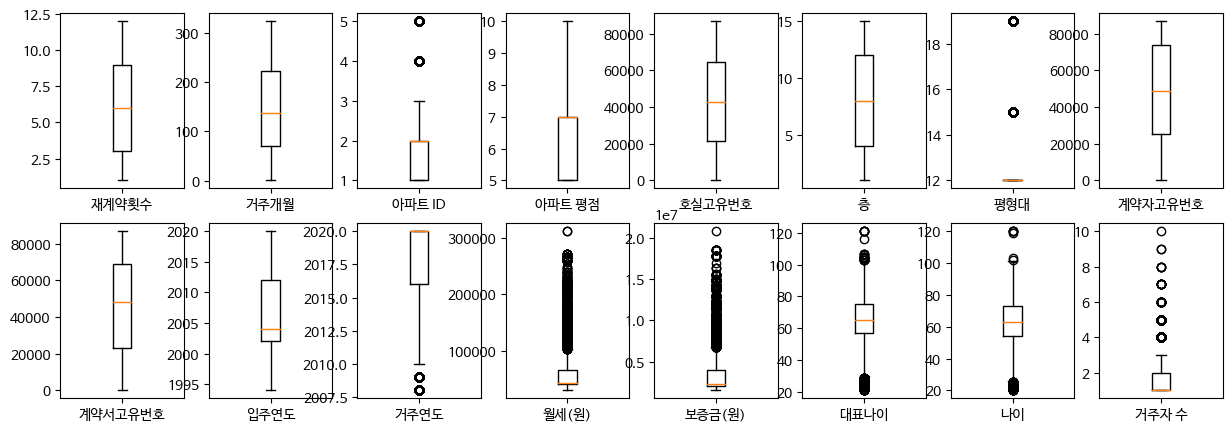

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 8, figsize = (15,5))
for ax, col in zip(axes.ravel(), numeric_columns):
  ax.boxplot(result[col])
  ax.set_xticklabels([col])

plt.show()

<ipython-input-221-48d7eea047ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result[col].unique())
<ipython-input-221-48d7eea047ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result[col].unique())
<ipython-input-221-48d7eea047ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result[col].unique())
<ipython-input-221-48d7eea047ab>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result[col].unique())


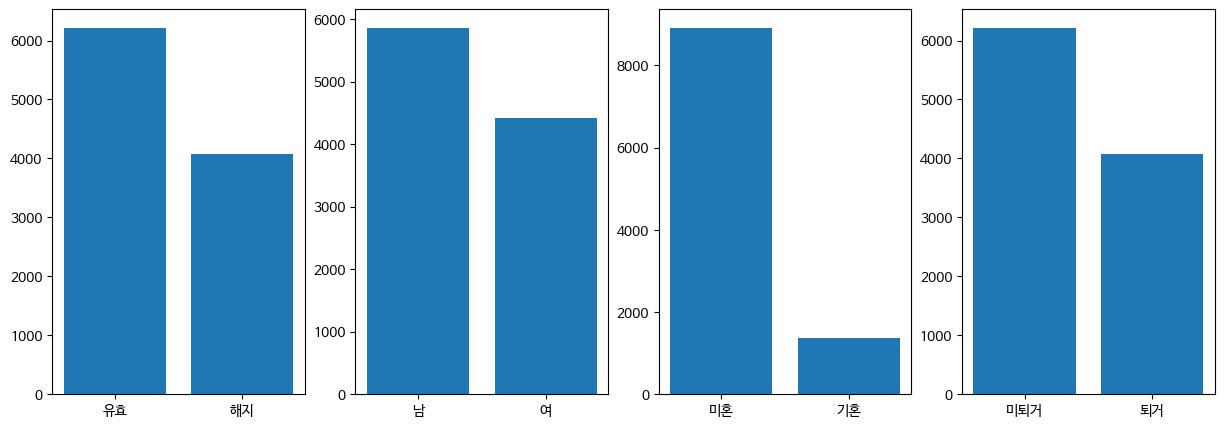

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (15,5))
for ax, col in zip(axes.ravel(), object_columns):
  ax.bar(result[col].unique(), result[col].value_counts())
  ax.set_xticklabels(result[col].unique())

plt.show()

In [ ]:
result['나이'].unique()

array([ 45,  59,  49,  65,  76,  72,  67,  56,  58,  87,  46,  63,  47,
        73,  77,  70,  52,  53,  41,  61,  68,  30,  26,  83,  64,  54,
        62,  50,  57,  55,  51,  60,  25,  79,  32,  71,  90,  78,  66,
        43,  33,  84,  40,  69,  48,  35,  81,  28,  74,  82,  75,  80,
        44,  38,  86,  39,  22,  34,  85,  89,  23,  24,  36,  27,  93,
        92,  31,  20,  37,  29,  88,  91,  42,  21, 120,  98,  97,  95,
        96,  94, 103, 102, 119, 100,  99, 101])

In [ ]:
result['대표나이'].unique()

array([ 46,  68,  51,  66,  77,  73,  57,  59,  97,  50,  64,  48,  74,
        78,  88,  53,  54,  82,  42,  63,  69,  31,  33,  60,  84,  65,
        55,  62,  58,  56,  52,  61,  26,  80,  45,  44,  92,  72,  79,
        67,  49,  71,  85,  43,  70,  47,  29,  75,  81,  89,  83,  36,
        76,  39,  41,  87,  34,  90,  86,  37,  93,  40,  28,  96,  94,
        35,  30,  27,  91,  32,  21, 100, 101,  22,  23,  24,  38, 121,
       107,  99,  25, 104,  98,  95, 105, 103, 116, 102, 106])

In [ ]:
result['보증금(원)']

순번
1        11774400
2         5408000
3         3197000
4         2078000
5         9780000
           ...   
12879    18536400
12880     2365000
12881    18536400
12882     3055000
12883     2365000
Name: 보증금(원), Length: 10290, dtype: int64

In [ ]:
result['계약구분'] = result['계약구분'].map({'유효': 1, '해지' : 0})
result['성별'] = result['성별'].map({'남': 1, '여' : 0})
result['결혼여부'] = result['결혼여부'].map({'미혼': 1, '기혼' : 0})
result['퇴거여부'] = result['퇴거여부'].map({'미퇴거': 1, '퇴거' : 0})

<ipython-input-225-76447439ab9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['계약구분'] = result['계약구분'].map({'유효': 1, '해지' : 0})
<ipython-input-225-76447439ab9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['성별'] = result['성별'].map({'남': 1, '여' : 0})
<ipython-input-225-76447439ab9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [ ]:
result[['계약구분','성별','결혼여부','퇴거여부']]

,계약구분,성별,결혼여부,퇴거여부
순번,,,,
1,1,1,1,1
2,0,0,1,0
3,0,0,1,0
4,1,1,1,1
5,1,0,1,1
...,...,...,...,...
12879,1,0,1,1
12880,1,1,1,1
12881,1,1,1,1


In [ ]:
result.columns

Index(['계약구분', '재계약횟수', '거주개월', '아파트 ID', '아파트 평점', '호실고유번호', '층', '평형대',
       '계약자고유번호', '계약서고유번호', '입주연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이',
       '성별', '결혼여부', '거주자 수', '퇴거여부'],
      dtype='object')

In [ ]:
# 필요없는 열 제거
# 호실 고유번호, 층, 계약자고유번호, 계약서고유번호

In [ ]:
result.drop(['호실고유번호', '층','계약자고유번호', '계약서고유번호'], axis = 1,inplace = True)

<ipython-input-229-5548702439cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop(['호실고유번호', '층','계약자고유번호', '계약서고유번호'], axis = 1,inplace = True)


In [ ]:
result.head()

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
순번,,,,,,,,,,,,,,,,
1,1,10,222,5,7.0,12,2003,2020,152040,11774400,46,45,1,1,3,1
2,0,5,108,5,7.0,12,2003,2012,69900,5408000,68,59,0,1,1,0
3,0,4,81,5,7.0,12,2013,2019,45700,3197000,51,49,0,1,3,0
4,1,1,8,5,7.0,12,2020,2020,38000,2078000,66,65,1,1,1,1
5,1,10,222,5,7.0,15,2003,2020,126300,9780000,77,76,0,1,2,1


In [ ]:
correlation = result.corr()
correlation

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부
계약구분,1.000000,0.311289,0.272321,0.037161,0.035779,0.044498,0.242063,0.763621,0.048792,0.034187,0.013493,0.209118,0.006282,0.070781,-0.197993,1.000000
재계약횟수,0.311289,1.000000,0.961807,0.079732,0.080113,0.070923,-0.737454,0.372423,0.381606,0.393111,0.182964,0.273480,-0.095022,-0.083456,-0.045071,0.311289
거주개월,0.272321,0.961807,1.000000,0.044759,0.042061,0.066978,-0.799071,0.340731,0.382211,0.383451,0.175882,0.258461,-0.083005,-0.089423,-0.011171,0.272321
아파트 ID,0.037161,0.079732,0.044759,1.000000,0.906137,0.129067,-0.028137,0.023800,0.125736,0.096040,0.000974,0.007056,-0.029551,-0.019972,0.069878,0.037161
아파트 평점,0.035779,0.080113,0.042061,0.906137,1.000000,0.138418,-0.030546,0.015082,0.118741,0.082449,0.017793,0.021171,-0.024988,-0.028263,0.061570,0.035779
평형대,0.044498,0.070923,0.066978,0.129067,0.138418,1.000000,-0.043622,0.037514,0.359090,0.300640,-0.058999,-0.047734,0.100472,-0.227402,0.344012,0.044498
입주연도,0.242063,-0.737454,-0.799071,-0.028137,-0.030546,-0.043622,1.000000,0.288679,-0.312366,-0.327803,-0.185863,-0.106614,0.085457,0.140391,-0.130004,0.242063
거주연도,0.763621,0.372423,0.340731,0.023800,0.015082,0.037514,0.288679,1.000000,0.117091,0.094256,-0.022427,0.234864,0.002535,0.078064,-0.219067,0.763621
월세(원),0.048792,0.381606,0.382211,0.125736,0.118741,0.359090,-0.312366,0.117091,1.000000,0.982385,0.049294,0.077981,-0.002160,-0.167967,0.163868,0.048792
보증금(원),0.034187,0.393111,0.383451,0.096040,0.082449,0.300640,-0.327803,0.094256,0.982385,1.000000,0.051852,0.074607,-0.010890,-0.159376,0.149340,0.034187


<Axes: >

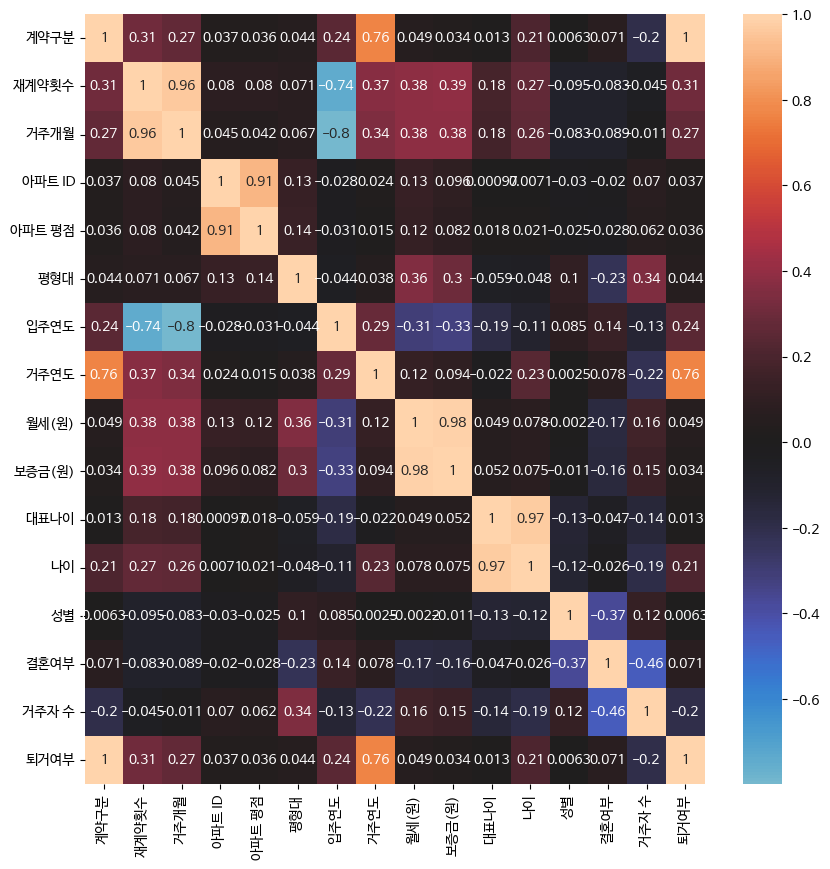

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation,annot=True,center=0)

In [ ]:
# 다중 공선성이 10 넘는 변수가 많으므로 추후 변수 선택법으로 차원 축소 시행

EDA 결과 <br/>
대표나이와 나이에서 100살이 넘는 사람이 있음  
임대 아파트 거주자 나이가 100살보다 많은 경우를 이상치로 간주  
범주형 변수 onehot 라벨링  
다중 공선성이 10 넘는 변수가 많으므로 추후 변수 선택법으로 차원 축소 시행

**1-3**  
이상치 처리

In [ ]:
result['대표나이'] = [x if x <= 100 else 100 for x in result['대표나이']]
result['나이'] = [x if x <= 100 else 100 for x in result['나이']]

<ipython-input-234-e9b90b181ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['대표나이'] = [x if x <= 100 else 100 for x in result['대표나이']]
<ipython-input-234-e9b90b181ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['나이'] = [x if x <= 100 else 100 for x in result['나이']]


**2-1**  
재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [ ]:
result['target'] = ['높음' if x >= result['재계약횟수'].median() else '낮음' for x in result['재계약횟수']]
result.head()

<ipython-input-235-29d19cd05113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['target'] = ['높음' if x >= result['재계약횟수'].median() else '낮음' for x in result['재계약횟수']]


,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부,target
순번,,,,,,,,,,,,,,,,,
1,1,10,222,5,7.0,12,2003,2020,152040,11774400,46,45,1,1,3,1,높음
2,0,5,108,5,7.0,12,2003,2012,69900,5408000,68,59,0,1,1,0,낮음
3,0,4,81,5,7.0,12,2013,2019,45700,3197000,51,49,0,1,3,0,낮음
4,1,1,8,5,7.0,12,2020,2020,38000,2078000,66,65,1,1,1,1,낮음
5,1,10,222,5,7.0,15,2003,2020,126300,9780000,77,76,0,1,2,1,높음


**2-2**

차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [ ]:
result.head()

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부,target
순번,,,,,,,,,,,,,,,,,
1,1,10,222,5,7.0,12,2003,2020,152040,11774400,46,45,1,1,3,1,높음
2,0,5,108,5,7.0,12,2003,2012,69900,5408000,68,59,0,1,1,0,낮음
3,0,4,81,5,7.0,12,2013,2019,45700,3197000,51,49,0,1,3,0,낮음
4,1,1,8,5,7.0,12,2020,2020,38000,2078000,66,65,1,1,1,1,낮음
5,1,10,222,5,7.0,15,2003,2020,126300,9780000,77,76,0,1,2,1,높음


In [ ]:
# 변수 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(result.drop(['계약구분','성별','결혼여부','퇴거여부','target'], axis = 1))

In [ ]:
df = result.drop(['계약구분','성별','결혼여부','퇴거여부','target'], axis = 1)
df.iloc[:,:] = scaled_data
df[['계약구분','성별','결혼여부','퇴거여부','target']] = result[['계약구분','성별','결혼여부','퇴거여부','target']]
df.head()

,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,계약구분,성별,결혼여부,퇴거여부,target
순번,,,,,,,,,,,,,,,,,
1,1.284357,1.086761,3.683148,0.496483,-0.522053,-0.657854,0.617829,2.187259,2.578671,-1.445991,-1.244749,1.329060,1,1,1,1,높음
2,-0.270544,-0.382951,3.683148,0.496483,-0.522053,-0.657854,-1.579609,0.148115,0.518284,0.156426,-0.255373,-0.698670,0,0,1,0,낮음
3,-0.581524,-0.731041,3.683148,0.496483,-0.522053,0.948114,0.343149,-0.452656,-0.197272,-1.081805,-0.962070,1.329060,0,0,1,0,낮음
4,-1.514465,-1.672172,3.683148,0.496483,-0.522053,2.072291,0.617829,-0.643810,-0.559420,0.010752,0.168646,-0.698670,1,1,1,1,낮음
5,1.284357,1.086761,3.683148,0.496483,0.760641,-0.657854,0.617829,1.548257,1.933214,0.811961,0.946013,0.315195,1,0,1,1,높음


In [ ]:
# 변수들 간의 다중공선성을 확인하자
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = df.iloc[:, :-1]

vif = pd.DataFrame()
vif["Variable"] = df_vif.columns
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif.sort_values(by="VIF", ascending=True).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,거주자 수,1.377194
1,평형대,1.433253
2,성별,1.697337
3,결혼여부,4.980194
4,아파트 ID,5.634363
5,아파트 평점,5.742185
6,재계약횟수,15.798611
7,보증금(원),35.854824
8,월세(원),37.283909
9,입주연도,311.517126


In [ ]:
df.head()

,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,거주자 수,계약구분,성별,결혼여부,퇴거여부,target
순번,,,,,,,,,,,,,,,,,
1,1.284357,1.086761,3.683148,0.496483,-0.522053,-0.657854,0.617829,2.187259,2.578671,-1.445991,-1.244749,1.329060,1,1,1,1,높음
2,-0.270544,-0.382951,3.683148,0.496483,-0.522053,-0.657854,-1.579609,0.148115,0.518284,0.156426,-0.255373,-0.698670,0,0,1,0,낮음
3,-0.581524,-0.731041,3.683148,0.496483,-0.522053,0.948114,0.343149,-0.452656,-0.197272,-1.081805,-0.962070,1.329060,0,0,1,0,낮음
4,-1.514465,-1.672172,3.683148,0.496483,-0.522053,2.072291,0.617829,-0.643810,-0.559420,0.010752,0.168646,-0.698670,1,1,1,1,낮음
5,1.284357,1.086761,3.683148,0.496483,0.760641,-0.657854,0.617829,1.548257,1.933214,0.811961,0.946013,0.315195,1,0,1,1,높음


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# 종속 변수와 독립 변수 분리
X = df.drop(columns=['target'])
y = [0 if x == '높음' else 1 for x in df['target']]

# 단계적 변수 선택법을 위한 함수 정의
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # 후보 변수 중에 추가할 변수 찾기
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add 1 feature: {best_feature}, AIC: {model.aic:.2f}')

        # 후보 변수 중에서 제거할 변수 찾기
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop 1 feature: {worst_feature}, AIC: {model.aic:.2f}')

        if not changed:
            break
    return included

# 단계적 변수 선택법 적용
selected_variables = stepwise_selection(X, y)

# 최종 선택된 변수 출력
print("최종 선택된 변수:", selected_variables)

<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add 1 feature: 거주연도, AIC: 13543.63
Add 1 feature: 재계약횟수, AIC: 12077.03


<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add 1 feature: 퇴거여부, AIC: -1318.35
Add 1 feature: 계약구분, AIC: -1877.00


<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add 1 feature: 입주연도, AIC: -1876.94
Add 1 feature: 아파트 평점, AIC: -1904.37


<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add 1 feature: 거주자 수, AIC: -1915.90
Add 1 feature: 결혼여부, AIC: -1925.21


<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add 1 feature: 거주개월, AIC: -1931.20


<ipython-input-192-d4195aba6c98>:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


최종 선택된 변수: ['거주연도', '재계약횟수', '퇴거여부', '계약구분', '입주연도', '아파트 평점', '거주자 수', '결혼여부', '거주개월']


In [ ]:
# 최종 선택된 변수
selected_variables

['거주연도', '재계약횟수', '퇴거여부', '계약구분', '입주연도', '아파트 평점', '거주자 수', '결혼여부', '거주개월']

In [ ]:
df_final = df[selected_variables + ['target']]
df_final

,거주연도,재계약횟수,퇴거여부,계약구분,입주연도,아파트 평점,거주자 수,결혼여부,거주개월,target
순번,,,,,,,,,,
1,0.617829,1.284357,1,1,-0.657854,0.496483,1.329060,1,1.086761,높음
2,-1.579609,-0.270544,0,0,-0.657854,0.496483,-0.698670,1,-0.382951,낮음
3,0.343149,-0.581524,0,0,0.948114,0.496483,1.329060,1,-0.731041,낮음
4,0.617829,-1.514465,1,1,2.072291,0.496483,-0.698670,1,-1.672172,낮음
5,0.617829,1.284357,1,1,-0.657854,0.496483,0.315195,1,1.086761,높음
...,...,...,...,...,...,...,...,...,...,...
12879,0.617829,1.284357,1,1,-0.657854,1.280079,-0.698670,1,1.086761,높음
12880,0.617829,0.973377,1,1,-0.979047,1.280079,-0.698670,1,1.267251,높음
12881,0.617829,1.595338,1,1,-1.942627,1.280079,0.315195,1,2.221275,높음


**3-1**

재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [ ]:
# 기술 통계량 계산
# 시각화

In [ ]:
df_high = result[df_final.columns][result.target == '높음']
df_low = result[df_final.columns][result.target == '낮음']

In [ ]:
result.head()

,계약구분,재계약횟수,거주개월,아파트 ID,아파트 평점,평형대,입주연도,거주연도,월세(원),보증금(원),대표나이,나이,성별,결혼여부,거주자 수,퇴거여부,target
순번,,,,,,,,,,,,,,,,,
1,1,10,222,5,7.0,12,2003,2020,152040,11774400,46,45,1,1,3,1,높음
2,0,5,108,5,7.0,12,2003,2012,69900,5408000,68,59,0,1,1,0,낮음
3,0,4,81,5,7.0,12,2013,2019,45700,3197000,51,49,0,1,3,0,낮음
4,1,1,8,5,7.0,12,2020,2020,38000,2078000,66,65,1,1,1,1,낮음
5,1,10,222,5,7.0,15,2003,2020,126300,9780000,77,76,0,1,2,1,높음


In [ ]:
df_high.describe()

,거주연도,재계약횟수,퇴거여부,계약구분,입주연도,아파트 평점,거주자 수,결혼여부,거주개월
count,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000
mean,2019.054549,8.617784,0.717355,0.717355,2003.247712,6.425690,1.635905,0.841771,201.987110
std,1.974902,1.546730,0.450327,0.450327,2.639654,1.279385,0.881569,0.364990,37.622416
min,2010.000000,6.000000,0.000000,0.000000,1994.000000,5.000000,1.000000,0.000000,103.000000
25%,2020.000000,7.000000,0.000000,0.000000,2002.000000,5.000000,1.000000,1.000000,173.000000
50%,2020.000000,9.000000,1.000000,1.000000,2003.000000,7.000000,1.000000,1.000000,219.000000
75%,2020.000000,10.000000,1.000000,1.000000,2004.000000,7.000000,2.000000,1.000000,230.000000
max,2020.000000,12.000000,1.000000,1.000000,2011.000000,10.000000,8.000000,1.000000,323.000000


In [ ]:
df_low.describe()

,거주연도,재계약횟수,퇴거여부,계약구분,입주연도,아파트 평점,거주자 수,결혼여부,거주개월
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2016.337047,2.890622,0.481872,0.481872,2011.269192,6.302123,1.746810,0.894065,68.004456
std,4.422554,1.376827,0.499722,0.499722,6.308282,1.269805,1.085815,0.307785,40.833471
min,2008.000000,1.000000,0.000000,0.000000,1994.000000,5.000000,1.000000,0.000000,1.000000
25%,2012.000000,2.000000,0.000000,0.000000,2005.000000,5.000000,1.000000,1.000000,36.000000
50%,2020.000000,3.000000,0.000000,0.000000,2013.000000,7.000000,1.000000,1.000000,68.000000
75%,2020.000000,4.000000,1.000000,1.000000,2016.000000,7.000000,2.000000,1.000000,96.000000
max,2020.000000,5.000000,1.000000,1.000000,2020.000000,10.000000,10.000000,1.000000,318.000000


TypeError: ignored

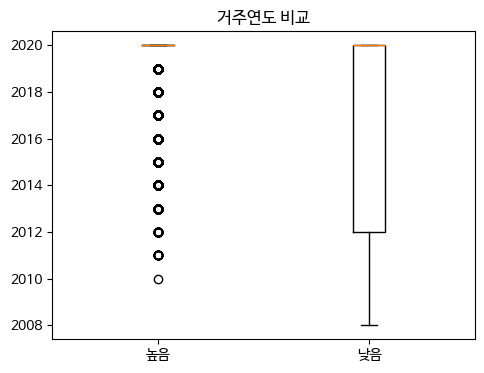

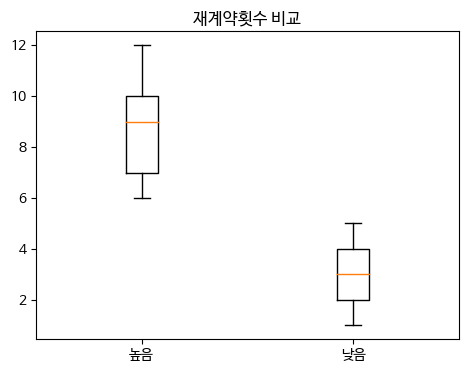

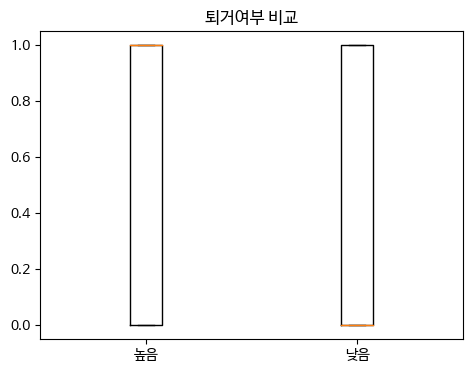

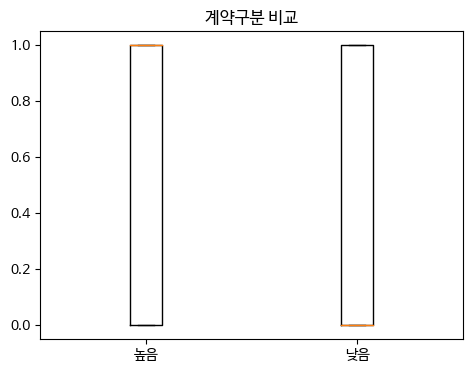

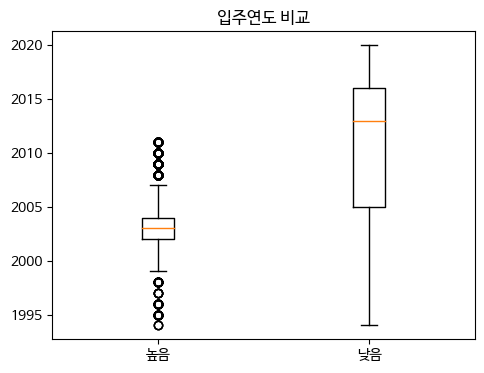

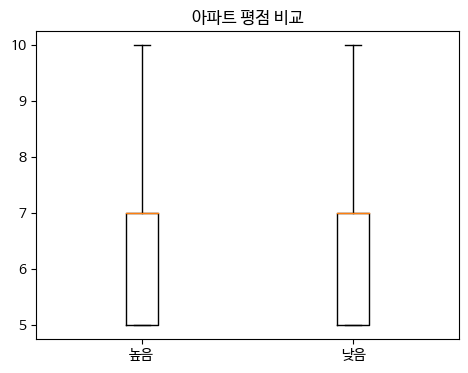

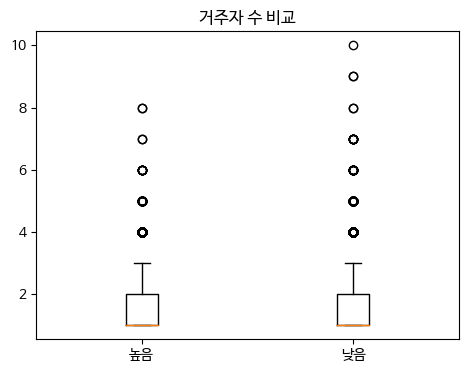

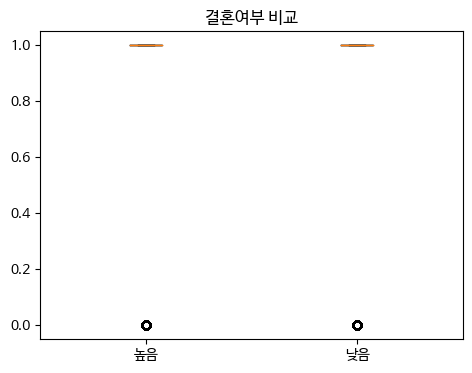

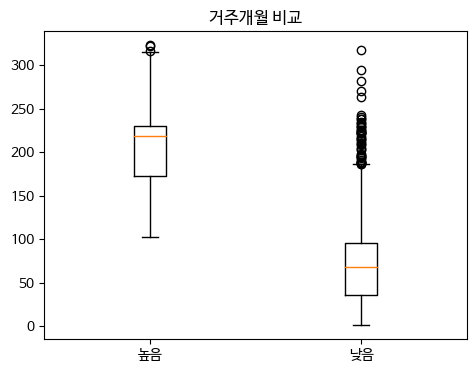

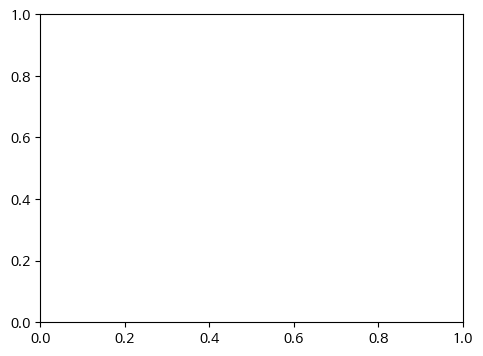

In [ ]:
for col in df_high.columns:
  plt.figure(figsize=(12, 4))

  # NumericVar1에 대한 박스 플롯
  plt.subplot(1, 2, 1)
  plt.boxplot([df_high[col], df_low[col]], labels=['높음', '낮음'])
  plt.title(f'{col} 비교')

**3-2**

재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [ ]:
df_final.head()

,거주연도,재계약횟수,퇴거여부,계약구분,입주연도,아파트 평점,거주자 수,결혼여부,거주개월,target
순번,,,,,,,,,,
1,0.617829,1.284357,1,1,-0.657854,0.496483,1.329060,1,1.086761,높음
2,-1.579609,-0.270544,0,0,-0.657854,0.496483,-0.698670,1,-0.382951,낮음
3,0.343149,-0.581524,0,0,0.948114,0.496483,1.329060,1,-0.731041,낮음
4,0.617829,-1.514465,1,1,2.072291,0.496483,-0.698670,1,-1.672172,낮음
5,0.617829,1.284357,1,1,-0.657854,0.496483,0.315195,1,1.086761,높음


In [ ]:
# 회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_final.drop(['재계약횟수', 'target'], axis = 1)
y = result.재계약횟수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LinearRegression()
fitted_lr = lr.fit(X_train, y_train)
y_predict_lr = fitted_lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Square error :",  mean_squared_error(y_test,y_predict_lr))
print("R2 score :",  r2_score(y_test, y_predict_lr))

Mean Square error : 0.6682222787129019
R2 score : 0.9361432234750351


In [ ]:
lgr = LogisticRegression()
fitted_lgr = lgr.fit(X_train, y_train)
y_predict_lgr = fitted_lgr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Mean Square error :",  mean_squared_error(y_test,y_predict_lgr))
print("R2 score :",  r2_score(y_test, y_predict_lgr))

Mean Square error : 0.7152575315840622
R2 score : 0.9316484322550025


In [ ]:
# MSE 오차도 더 낮고 R2 결정계수 값도 LinearRegression 이 더 크므로 LinearRegression 채택

In [ ]:
# 분류 분석

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_predict_rf = rf.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_predict_rf)
accuracy = accuracy_score(y_test, y_predict_rf)
print("mean_squared_error:", mean_squared_error)
print("Accuracy:", accuracy)

mean_squared_error: 0.6700680272108843
Accuracy: 0.8192419825072886


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict_gb = gb.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_predict_gb)
accuracy = accuracy_score(y_test, y_predict_gb)
print("mean_squared_error:", mse)
print("Accuracy:", accuracy)

mean_squared_error: 0.6311953352769679
Accuracy: 0.8343051506316812


In [ ]:
# 정확도 및 mse 가 gradient_boosting 이 더 좋게 나타나므로 채택

**3-3**

최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

In [ ]:
# LinearRegression 변수 중요도

In [ ]:
pd.DataFrame(fitted_lr.coef_, X.columns)

,0
거주연도,-0.898792
퇴거여부,-0.041090
계약구분,-0.041090
입주연도,1.703289
아파트 평점,0.135749
거주자 수,-0.099887
결혼여부,-0.172602
거주개월,4.753102


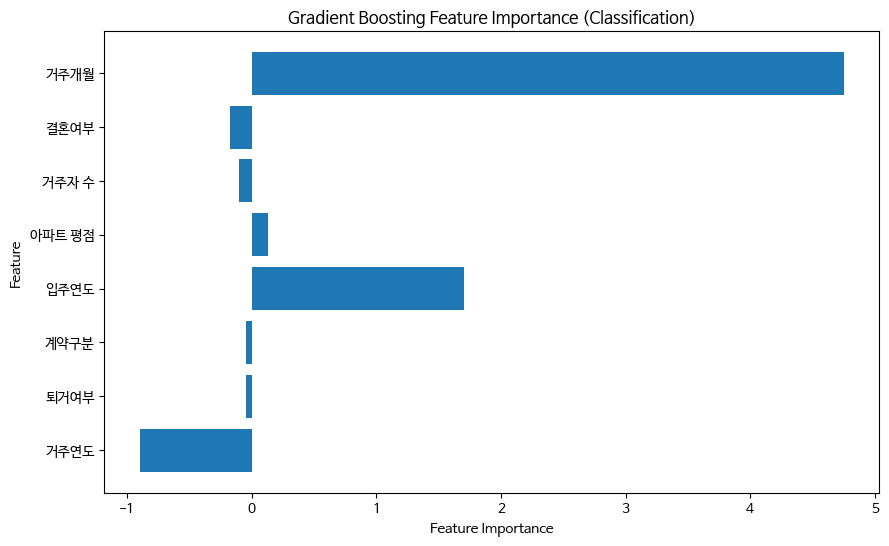

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), fitted_lr.coef_, align='center')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance (Classification)')
plt.show()

In [ ]:
# GradientBoostingClassification 변수 중요도

In [ ]:
feature_importance=gb.feature_importances_

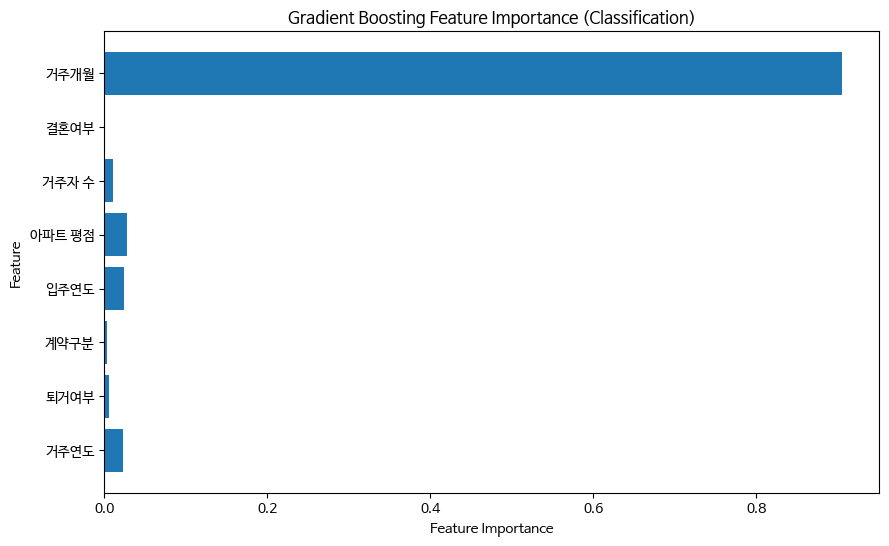

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), feature_importance, align='center')
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance (Classification)')
plt.show()

3-4

해당 데이터 분석결과로 얻을 수 있는 점 제시

In [ ]:
# 가장 큰 영향을 미치는 것은 거주개월 수로 오래 살 수 있는 환경을 만드는 것이 중요함

## 대분류 2번

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv',encoding= 'cp949', index_col = 0)
df.head()

,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,a5_2,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
game_id,,,,,,,,,,,,,,,,,,,,,
201900016,5,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
201900023,6,4,5,5,2,5,1,1,6,5,...,7,3,0,0,1,0,1,3,1,0
201900103,5,6,5,5,1,9,5,4,6,1,...,6,0,0,1,1,4,1,2,0,1
201900112,5,7,6,1,5,5,1,5,1,5,...,5,0,3,0,0,0,0,1,0,0
201900131,5,1,2,5,2,5,7,2,6,6,...,6,0,2,4,1,2,2,0,1,0


A 야구구단의 시합 결과중 일부를 나타낸다.
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.

ai_j 는 i회의 j번째 타자의 행동,
bi 는 i회의 득점

## 대분류 3번

**5**

제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [ ]:
round(25*24*23 / 6 * (0.03)**3 * (0.97)**22, 4)

0.0318

6

C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

**7-1**

각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

데이터 설명 : 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')

In [ ]:
df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# oneway anova 분석
f_statistic, p_value = f_oneway(df[df['name'] == 'A']['ratio'],
                                 df[df['name'] == 'B']['ratio'],
                                 df[df['name'] == 'C']['ratio'],
                                 df[df['name'] == 'D']['ratio'])

(24.97695307518529, 2.8174779556216382e-06)

In [ ]:
# 결과 출력
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# 결과 해석
alpha = 0.05  # 유의수준 (일반적으로 0.05를 사용)
if p_value < alpha:
    print("귀무 가설을 기각합니다. 네 차종 간에는 범퍼 파손 정도의 평균에 유의한 차이가 있습니다.")
else:
    print("귀무 가설을 채택합니다. 네 차종 간에는 범퍼 파손 정도의 평균에 유의한 차이가 없습니다.")


F-statistic: 24.97695307518529
P-value: 2.8174779556216382e-06
귀무 가설을 기각합니다. 네 차종 간에는 범퍼 파손 정도의 평균에 유의한 차이가 있습니다.


7-2

귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.¶

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey-Kramer 사후 분석 수행
tukey_result = pairwise_tukeyhsd(df['ratio'], df['name'])

# 결과 출력
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


In [ ]:
# Tukey-Kramer 사후 분석에도 A,D 를 제외한 그룹에서 집단 간의 평균 차이는 유의미한 것으로 확인됨

**8**

L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [ ]:
0.13 * 0.011 / (0.13 * 0.011 + 0.37 * 0.021 + 0.50 * 0.033)

0.055642023346303505